In [89]:
from qiskit import QuantumCircuit

In [90]:
from qiskit_ibm_provider import IBMProvider

file_token = open("ibm_login_token_clemens.txt")
token = file_token.read()
file_token.close()

IBMProvider.save_account(overwrite=True, token=token)
provider = IBMProvider()


name = 'ibm_osaka'
backend = provider.get_backend(name)

In [95]:
t1 = backend.properties().t1(0)
t1 /= backend.dt

In [144]:
t2 = backend.properties().t2(0)
t2 /= backend.dt

In [96]:
print(backend.dt)

5e-10


In [97]:
print(t1)

748257.5276709498


In [98]:

def generate_integers(float_value):
    # Step 1: Find the largest integer divisible by 16 that is less than or equal to the float
    max_int = int((float_value // 16) * 16)*3
    print(max_int)
    # Step 2: Calculate the step size
    # Since we need 20 equally spaced integers
    step_size = max_int // 20
    
    # Ensure the step size is divisible by 16
    step_size = (step_size // 16) * 16
    # Step 3: Generate the list of 20 integers
    result = [max_int - step_size * i for i in range(20)]
    
    return result
print(t1)
durations = generate_integers(t1)[::-1]
print(durations)

748257.5276709498
2244768
[112512, 224736, 336960, 449184, 561408, 673632, 785856, 898080, 1010304, 1122528, 1234752, 1346976, 1459200, 1571424, 1683648, 1795872, 1908096, 2020320, 2132544, 2244768]


In [145]:
durations2 = generate_integers(t2)[::-1]

1711248


In [99]:
circuits = []
for i in range(20):
    qc = QuantumCircuit(1,1)
    qc.x(0)
    qc.delay(durations[i],0, unit = 'dt')
    qc.measure(0,0)
    circuits.append(qc)



In [146]:
circuitst2 = []
for i in range(20):
    qc = QuantumCircuit(1,1)
    qc.h(0) # prepare |+>
    
    qc.delay(durations2[i],0, unit = 'dt')
    
    qc.h(0) # measure in X basis
    qc.measure(0,0)
    circuitst2.append(qc)
print(circuitst2)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e84781e06e0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8482202630>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e847b300f20>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e847a9d0ad0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e84800a0fb0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8482202840>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e847a9353d0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8478b8a0c0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8482367f20>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8478bbf560>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e846ff95400>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e847b357980>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7e8481397ec0>, <qiskit.circuit.quantumcircuit.QuantumCircuit obje

In [100]:
from qiskit import transpile
real_circs = []
for qc in circuits:
        qc_real = transpile(qc, backend=backend)
        real_circs.append(qc_real)


In [147]:
from qiskit import transpile
real_circs2 = []
for qc in circuitst2:
        qc_real = transpile(qc, backend=backend)
        real_circs2.append(qc_real)


In [134]:
print(len(real_circs2))

20


In [131]:
print(f'Submit all {len(real_circs)} circuits to '+name)
job = backend.run(real_circs, shots = 1000)
job.job_id()

Submit all 60 circuits to ibm_osaka


'csdjerkx35wg00813sbg'

In [148]:
print(f'Submit all {len(real_circs2)} circuits to '+name)
job2 = backend.run(real_circs2, shots = 1000)
job2_id = job.job_id()

Submit all 20 circuits to ibm_osaka


In [103]:
job_id = 'csdhy20ca010008xcq80'
results_all = provider.backend.retrieve_job(job_id).result()


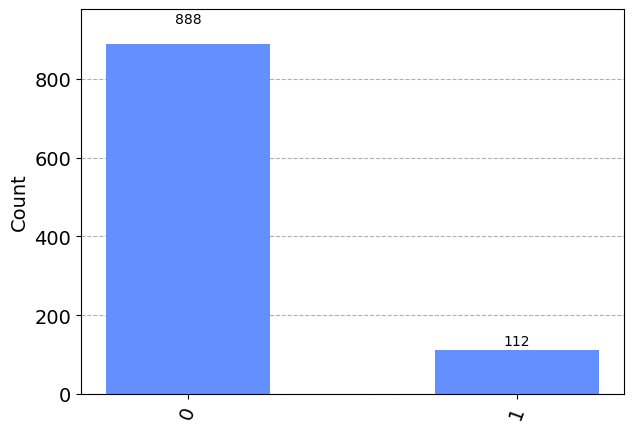

In [104]:
from qiskit.visualization import plot_histogram

counts_all = results_all.get_counts()
plot_histogram(counts_all[-1])



In [150]:
results_all2 = provider.backend.retrieve_job('csdjkaxtj7dg008cgjy0').result()
counts_all2 = results_all2.get_counts()


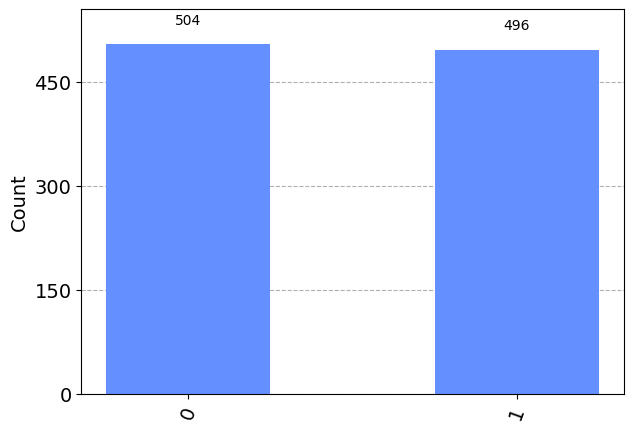

In [153]:
plot_histogram(counts_all2[-1])

# plot for a)

Optimal parameters:  [0.90945098 0.08257778]
A = 0.9094509842029029, B=0.08257778366861046


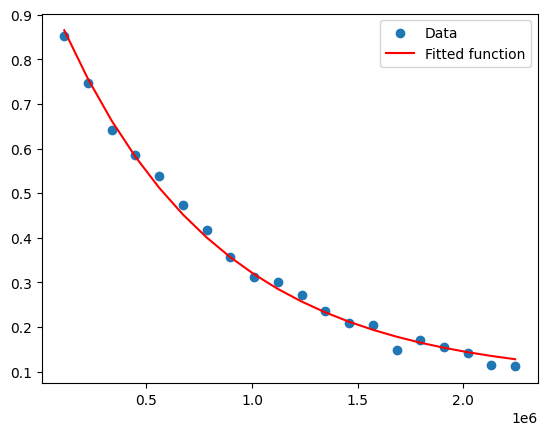

In [199]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def exponential_function(x, a, b):
    return a*np.exp(-x/t1) + b

percentages = np.array([(counts_all[i]['1']/1000) for i in range(20)])
durations1 = np.array([i for i in durations])

popt, pcov = curve_fit(exponential_function, durations, percentages)
# popt = [int(i) for i in popt]
print("Optimal parameters: ", popt)
# print(exponential_function(durations,1,2.3,0))
y_fit = [exponential_function(i, *popt) for i in durations1] 
print(f"A = {popt[0]}, B={popt[1]}")
plt.scatter(durations, percentages, label='Data')
plt.plot(durations, y_fit, color='red', label='Fitted function')
plt.legend()
plt.show()

# Plot for b)

Optimal parameters:  [-5.4834517   0.54360962  0.99999836  3.98246525]
A = -5.483451701598071, B=0.9999983631228612


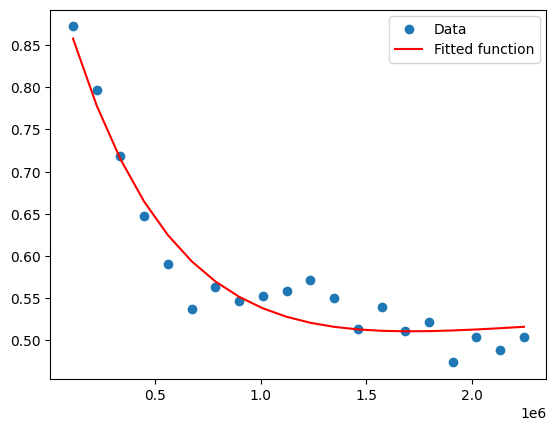

In [210]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def exponential_swing_function(x, a, b, w, phi):
    return a*np.exp(-x/t2)*np.cos(w*x+phi) + b

percentages = np.array([(counts_all2[i]['0']/1000) for i in range(20)])
durations21 = np.array([i for i in durations2])

popt, pcov = curve_fit(exponential_swing_function, durations21, percentages)
print("Optimal parameters: ", popt)
y_fit = [exponential_swing_function(i, *popt) for i in durations21] 
print(f"A = {popt[0]}, B={popt[2]}")
plt.scatter(durations, percentages, label='Data')
plt.plot(durations, y_fit, color='red', label='Fitted function')
plt.legend()
plt.show()

# part c)

In [179]:
circs31 = []
for i in range(20):
    qc = QuantumCircuit(127,127)
    qc.x(range(127))
    for j in range(127):
        qc.delay(durations[i], j, unit='dt')
        qc.measure(j,j)
    circs31.append(qc)


In [181]:
circs32 = []
for i in range(20):
    qc = QuantumCircuit(127,127)
    qc.h(range(127))
    for j in range(127):
        qc.delay(durations[i], j, unit='dt')
        qc.h(j)
        qc.measure(j,j)
    circs32.append(qc)

In [184]:
real_circs31 = []
for qc in circs31:
        qc_real = transpile(qc, backend=backend)
        real_circs31.append(qc_real)

real_circs32 = []
for qc in circs32:
        qc_real = transpile(qc, backend=backend)
        real_circs32.append(qc_real)

In [185]:
print(f'Submit all {len(real_circs31+real_circs32)} circuits to '+name)
job = backend.run(real_circs31+real_circs32, shots = 1000)
job.job_id()

Submit all 40 circuits to ibm_osaka


'csdk29sx35wg00813vb0'

In [203]:
job_id3 = 'csdk29sx35wg00813vb0'
results_all3 = provider.backend.retrieve_job(job_id3).result()

In [204]:
counts_all3 = results_all3.get_counts()
print(len(counts_all3))
counts31 = counts_all3[:20]
counts32 = counts_all3[20:]

40


## Plot for T1 with 127 qubits in parallel

[0.7367480314960629, 0.6071889763779528, 0.5070708661417322, 0.43040944881889764, 0.37059055118110235, 0.3183307086614173, 0.2775433070866142, 0.24215748031496062, 0.21628346456692912, 0.19236220472440946, 0.1714251968503937, 0.15449606299212598, 0.1411811023622047, 0.1290472440944882, 0.11729133858267717, 0.10860629921259843, 0.10097637795275591, 0.09411023622047245, 0.088251968503937, 0.0858503937007874]
Optimal parameters:  [0.76560997 0.02979092]
A = 0.7656099742742528, B=0.029790922658751665


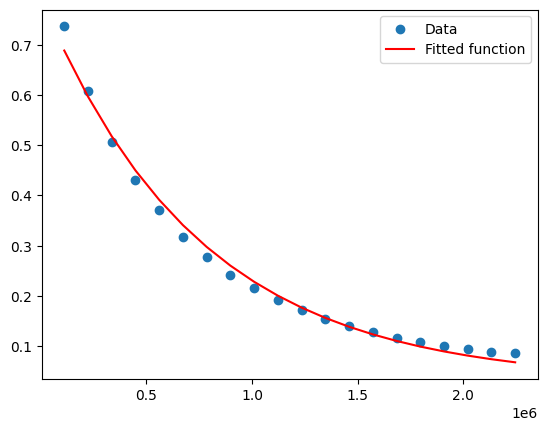

In [207]:
def exponential_function(x, a, b):
    return a*np.exp(-x/t1) + b
average1s = []
for j in range(20):
    average1 = 0
    for key, value in counts31[j].items():
        num = 0
        for letter in key:
            if letter == '1':
                num += 1
        average1 += num*value
    average1/=127*1000
    average1s.append(average1)
    
print(average1s)
percentages = np.array(average1s)
durations1 = np.array([i for i in durations])

popt, pcov = curve_fit(exponential_function, durations, percentages)
# # popt = [int(i) for i in popt]
print("Optimal parameters: ", popt)
# # print(exponential_function(durations,1,2.3,0))
y_fit = [exponential_function(i, *popt) for i in durations1] 
print(f"A = {popt[0]}, B={popt[1]}")
plt.scatter(durations, percentages, label='Data')
plt.plot(durations, y_fit, color='red', label='Fitted function')
plt.legend()
plt.show()

## Plot for T2 with 127 qubits

20


Optimal parameters:  [0.16780401 0.51026763 0.9999981  0.9834433 ]
A = 0.16780401040525725, B=0.9999980980542985


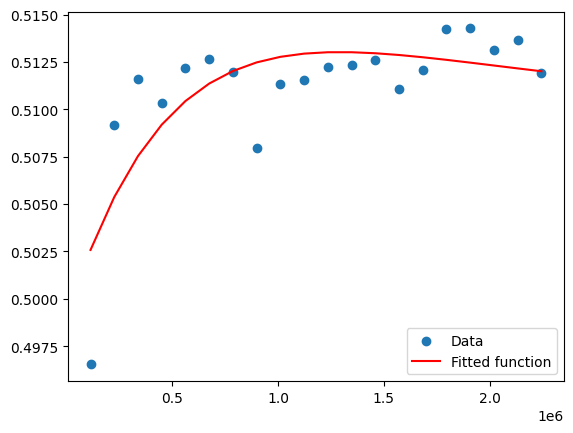

In [212]:
def exponential_swing_function(x, a, b, w, phi):
    return a*np.exp(-x/t2)*np.cos(w*x+phi) + b

print(len(counts32))
average0s = []
for j in range(20):
    average0 = 0
    for key, value in counts32[j].items():
        num = 0
        for letter in key:
            if letter == '0':
                num += 1
        average0 += num*value
    average0/=127*1000
    average0s.append(average0)



percentages = np.array(average0s)
durations21 = np.array([i for i in durations2])

popt, pcov = curve_fit(exponential_swing_function, durations21, percentages)
print("Optimal parameters: ", popt)
y_fit = [exponential_swing_function(i, *popt) for i in durations21] 
print(f"A = {popt[0]}, B={popt[2]}")
plt.scatter(durations, percentages, label='Data')
plt.plot(durations, y_fit, color='red', label='Fitted function')
plt.legend()
plt.show()